# Análise de Perfil de Cliente

### Objetivo

A partir dos dados obtidos no Kaggle (disponível em: https://www.kaggle.com/imakash3011/customer-personality-analysis) este projeto tem por objetivo fazer uma análise detalhada do perfil do cliente da empresa. Isto auxilia empresas no entendimento dos seus consumidores e facilita na adaptação dos produtos de acordo com suas necessidades.

### Organização do trabalho

1. Aquisição dos dados
2. Informações da base de dados
3. Gráficos





## Imports

In [1]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns


## 1. Aquisição dos dados

In [2]:
path = './'
filename = 'marketing_campaign.csv'

df = pd.read_csv(path+filename,header=0,sep='\t')

In [3]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. Informações da base de dados

O dataset contém 2240 entradas e 29 *features*. Todas as *features* não nulas, isto é, não há um ID com um campo vazio.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## 2. Gráficos

### Distribuição da data de nascimento

Pode-se perceber que há dois bom volumes de range de idade, como se fossem duas curvas de crescimento.

<AxesSubplot:xlabel='Year_Birth', ylabel='count'>

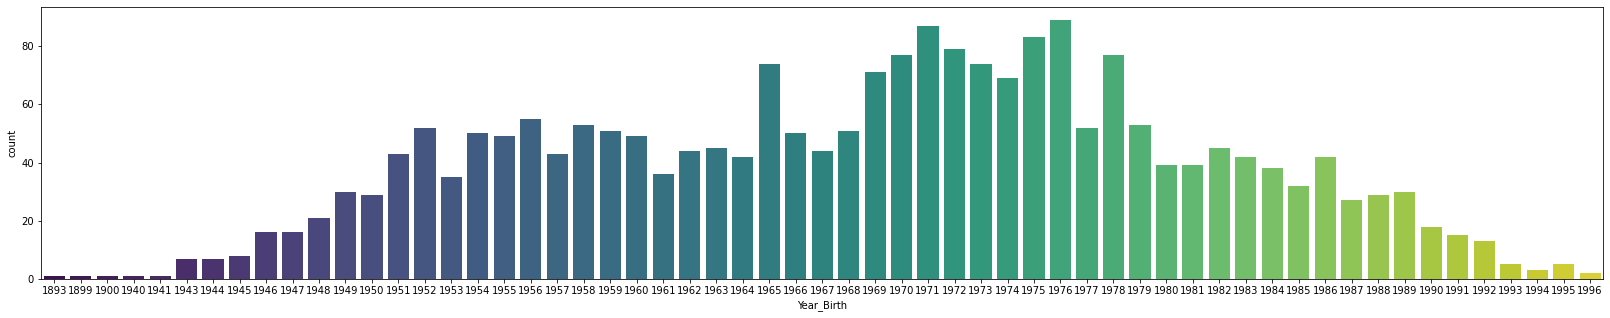

In [36]:
plt.figure(figsize=(28,5))
sns.countplot(x='Year_Birth',data=dataset, palette='viridis')

## Distribuição da escolaridade

Aqui percebe-se que a maioria dos consumidores possuem um grau de escolaridade alto, sendo a maioria da graduação ou PhD.

<AxesSubplot:xlabel='Education', ylabel='count'>

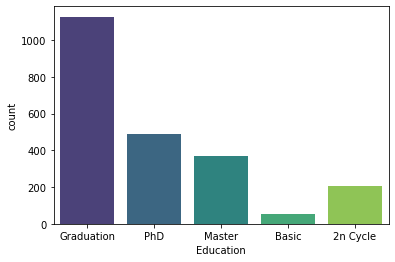

In [23]:
sns.countplot(x='Education',data=dataset, palette='viridis')

### Estado Civil

A maioria são cadsados e solteiros.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

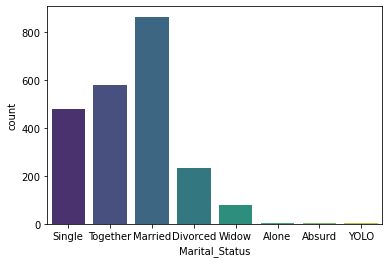

In [24]:
sns.countplot(x='Marital_Status',data=dataset, palette='viridis')

### Distribuição Salarial

Plotando os dados salariais, percebe-se que há alguns *outliers*.

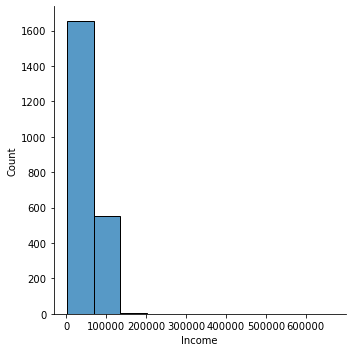

In [63]:
sns.displot(dataset['Income'], bins=10)

Por este motivo, decidiu-se remover esses outliers e observar como é a distribuição salarial. A maioria gira em torno de 20k-80k.

<Figure size 1440x288 with 0 Axes>

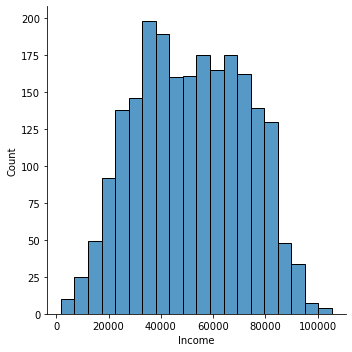

In [65]:
# Dataframe sem os outliers definidos como < 110k
df2 = dataset[dataset['Income'] < 110000]
plt.figure(figsize=(20,4))
# Plotar figura
sns.displot(df2['Income'], bins=20)